# Image Edge Detection Demonstration

In this notebook we demonstrate the use of **Sobel** edge operators and **Convolution** to
perform edge detection on an Image.

The techniques discussed on this notebook are about `computer vision` and provide inputs to Machine Learning algorithms.

## Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.ndimage

import skimage as im
import skimage.io
import skimage.color
from skimage.filters import sobel_h,sobel_v

%matplotlib inline

## Read Image

In [2]:
#filename="./images/dog.jpg"
#filename="./images/flower.jpg"
filename="../../raw/coins.jpg"

In [3]:
image=skimage.io.imread(filename)

In [4]:
image=skimage.color.rgb2gray(image)

In [5]:
image.shape

(190, 265)

/home/manel/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


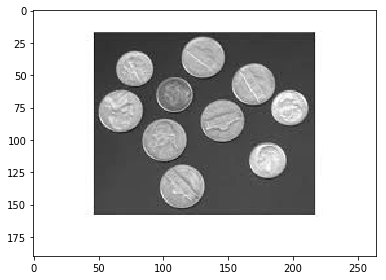

In [6]:
skimage.io.imshow(image)

## Sobel Filter and Gradient Calculation

We can perform convolution using low level matrix convolution functions from `scipy.signal` module

In [68]:
S_h = np.array([[ 1, 0,-1],
                [ 2, 0,-2],
                [ 1, 0,-1]],dtype=np.double)
S_v = np.array([[ 1, 2, 1],
                [ 0, 0, 0],
                [-1,-2,-1 ]],dtype=np.double)

In [69]:

conv_x=scipy.signal.convolve2d(image,S_h/4.0,mode="same",boundary="symm")
conv_y=scipy.signal.convolve2d(image,S_v/4.0,mode="same",boundary="symm")

Or use specialized wrappers from skimage.filters library

In [70]:
grad_x=sobel_v(image)
grad_y=sobel_h(image)

Image sizes match

In [71]:
image.shape,conv_x.shape,grad_x.shape

((190, 265), (190, 265), (190, 265))

And so do the gradients themselves

In [72]:
np.sum((conv_x-grad_x)**2),np.sum((conv_y-grad_y)**2)

(1.268742462051549e-29, 5.344022261437092e-29)

### Gradient Visualization

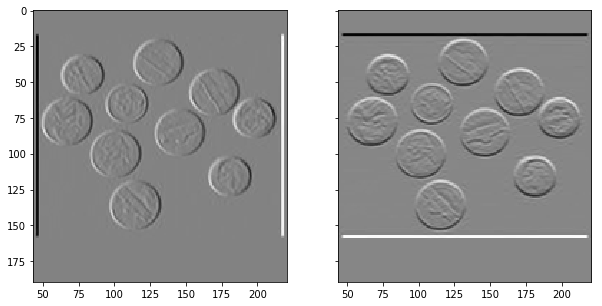

In [73]:
f, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))
ax1.imshow(grad_x,cmap="gray")
ax2.imshow(grad_y,cmap="gray")

## Threshold on Gradient Magnitude

In [13]:
grad=np.sqrt(grad_x*grad_x+grad_y*grad_y)

/home/manel/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


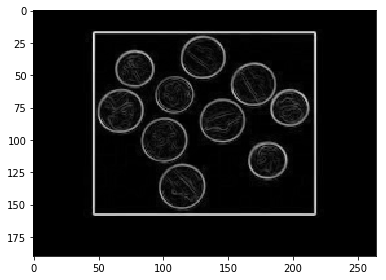

In [14]:
skimage.io.imshow(grad)

In [15]:
edge1= grad> 0.1
edge2= grad> 0.3

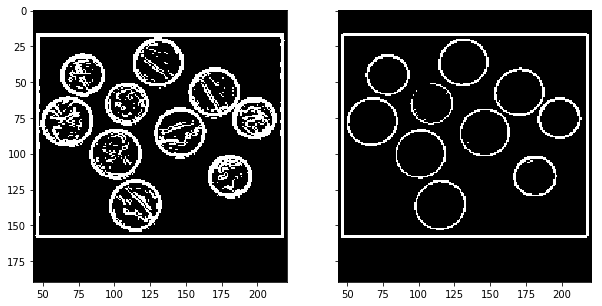

In [16]:
f, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))
ax1.imshow(edge1,cmap="gray")
ax2.imshow(edge2,cmap="gray")

## Directional Gradient

In [17]:
theta0=np.pi/4
theta1=-np.pi/4

In [18]:
G0=np.cos(theta0)*grad_x+np.sin(theta0)*grad_y
G1=np.cos(theta1)*grad_x+np.sin(theta1)*grad_y

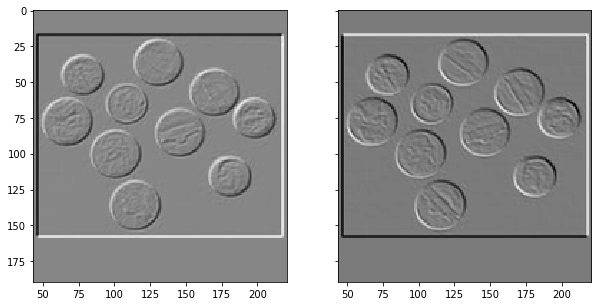

In [19]:
f, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))
ax1.imshow(G0,cmap="gray")
ax2.imshow(G1,cmap="gray")

In [20]:
F0=np.maximum(0,G0)
F1=np.maximum(0,G1)

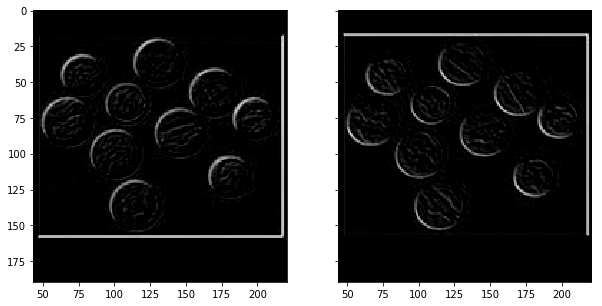

In [21]:
f, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))
ax1.imshow(F0,cmap="gray")
ax2.imshow(F1,cmap="gray")